In [2]:
results_file = "./val_pub_quniue_predicted.json"
full_input_file = "val_unique_pub.json"
pos_label = False

In [3]:
import pandas as pd

In [4]:
df_results = pd.read_json(results_file)
df_input = pd.read_json(full_input_file)

In [5]:
df_results.head(n=3)


,participant1Alias,participant2Id,pubmedId,participant2Alias,isNegative,pubmedTitle,pubmedabstract,interactionId,interactionType,participant1Id,isValid
0,"[[q01105-1], [Protein SET], [TAF-I alpha], [SE...",Q5SZB9,20668449,"[[ntm1a_human], [N-terminal Xaa-Pro-Lys N-meth...",True,NRMT is an alpha-N-methyltransferase that meth...,The post-translational methylation of alpha-am...,2662924_95688bfa-a2b9-4385-bc63-5300a7f8010c_f...,deubiquitination,Q01105-1,True
1,"[[rcc1_human], [Regulator of chromosome conden...",Q5SZB9,20668449,"[[ntm1a_human], [N-terminal Xaa-Pro-Lys N-meth...",True,NRMT is an alpha-N-methyltransferase that meth...,The post-translational methylation of alpha-am...,2662911_5425ab53-eb7f-434a-9cbe-ba3d5341fbdf_f...,acetylation,Q16269,True
10,"[[mk07_human], [Mitogen-activated protein kina...",Q9BZY3,20832753,"[[pml_human], [Protein PML], [PML], [MYL], [RN...",True,None,BMK1 is activated by mitogens and oncogenic si...,1014195_fa01ac4b-fe90-4fc8-8d17-b2494c6ecb97_f...,methylation,Q16634,True


In [6]:
df_input["actual"] =  - df_input["isNegative"]

In [7]:
df = df_input[["actual"]].merge(df_results, how='inner', left_index=True, right_index=True)

In [8]:
df_input.head(n=2)

,entityMentionsCount,hasTriggerWord,interactionId,interactionType,isNegative,lessThanThreshold,participant1Alias,participant1Id,participant2Alias,participant2Id,pubmedId,pubmedTitle,pubmedabstract,actual
0,2,True,2503513_5ef0f874-288f-49e8-8ad5-1a8e38b2c32b_f...,acetylation,True,True,"[[ksyk_human], [Tyrosine-protein kinase SYK], ...",P43405,"[[asc_human], [Apoptosis-associated speck-like...",Q9BSZ5,25605870,None,NLRP3 is the most crucial member of the NLR fa...,False
1,3,True,2503519_893fad3d-cfdf-46f1-a0e1-d88c0add3064_f...,ubiquitination,True,True,"[[ksyk_human], [Tyrosine-protein kinase SYK], ...",P43405,"[[q96p20-1], [NACHT, LRR and PYD domains-conta...",Q96P20-1,25605870,None,NLRP3 is the most crucial member of the NLR fa...,False


In [9]:
df["predicted"] = - df["isValid"]

## Analyse Results

In [10]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(df["actual"], df["predicted"], average='macro')  
accuracy = accuracy_score(df["actual"], df["predicted"], sample_weight=None)
print("The F1 score is {} and the accuracy is {}".format(f1, accuracy))

The F1 score is 0.8402567975830815 and the accuracy is 0.8912529550827423


In [11]:
!pip install scikit-plot==0.3.7

awsebcli 3.12.4 has requirement requests<=2.9.1,>=2.6.1, but you'll have requests 2.18.4 which is incompatible.
pytorch2keras 0.1.5 has requirement torch==0.4, but you'll have torch 0.4.1 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(df["actual"], df["predicted"], normalize=True )
plt.show()

<Figure size 640x480 with 2 Axes>

deubiquitination
acetylation
methylation
phosphorylation
dephosphorylation
ubiquitination


/Users/aeg/miniconda/envs/untitled2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


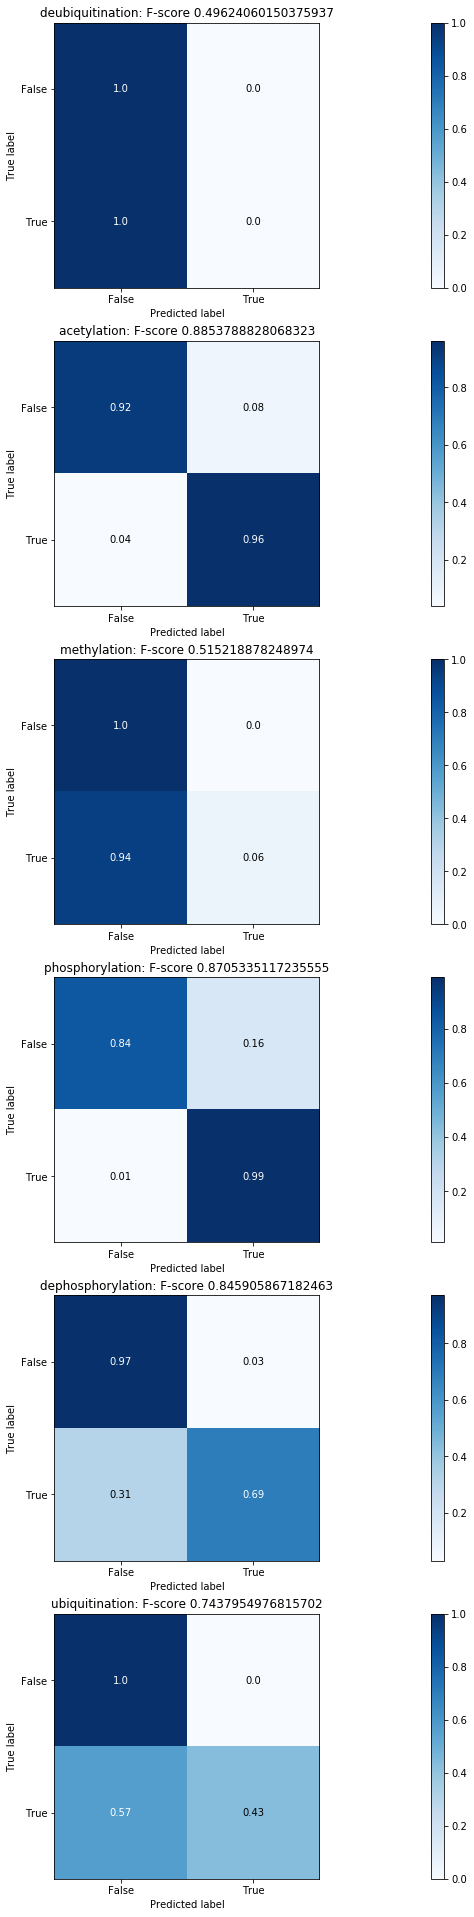

In [49]:
interactions = df["interactionType"].unique()
#fig, ax = plt.subplots(1, len(interactions), figsize=(40,40), squeeze=False, sharey=True, sharex=True)
fig = plt.figure(figsize=(40,40))
gs = fig.add_gridspec(7, 1)
#ax = fig.add_axes([0,0,1,1])
i = 0
for interaction in interactions:
    print(interaction)
    df_interaction_type = df.query("interactionType == '{}'".format(interaction))
    ax1 = fig.add_subplot(gs[i, 0])
    


    f1 = f1_score(df_interaction_type["actual"], df_interaction_type["predicted"], average='macro')  
    accuracy = accuracy_score(df_interaction_type["actual"], df_interaction_type["predicted"], sample_weight=None)
    skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=True, title = "{}: F-score {}".format(interaction,f1), ax= ax1)
    
#     ax2 = fig.add_subplot(gs[i, 1])
#     skplt.metrics.plot_confusion_matrix(df_interaction_type["actual"], df_interaction_type["predicted"], normalize=False, title = "{}: F-score {}".format(interaction,f1), ax= ax2)


    i += 1
    #break

plt.savefig("confusionmatrix_.jpg", bbox_inches='tight')
plt.show()
    
    


In [55]:
df_input["interactionType"].unique()

array(['acetylation', 'deubiquitination', 'phosphorylation',
       'dephosphorylation', 'methylation', 'ubiquitination'], dtype=object)

In [13]:
df["interactionType"].unique()

array(['deubiquitination', 'acetylation', 'methylation',
       'phosphorylation', 'dephosphorylation', 'ubiquitination'],
      dtype=object)